In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestRegressor 
from sklearn import metrics 

In [20]:
gold_data = pd.read_csv("gld_price_data.csv")

In [21]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [22]:
gold_data.drop(columns="Date", axis=1, inplace=True)

In [ ]:
# Our target/label is the GLD (Gold price) column

In [4]:
# For regression problems, best to alwys check how each columns are correlated 
# to each other 

# - Positive & Negative correlation 

In [23]:
correlation = gold_data.corr()

In [24]:
correlation

,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


<Axes: >

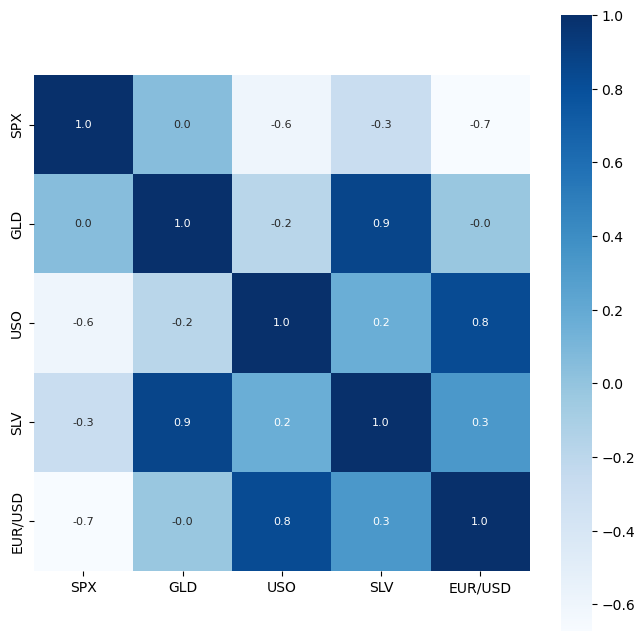

In [25]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap="Blues")

In [26]:
# See positive & negative correlation to GLD 

gold_correlation = correlation['GLD']

print(gold_correlation)

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/var/folders/56/0m1rn0pj71sfyq09pnrtnr880000gn/T/ipykernel_68161/774744526.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_correlation, color="green")


<Axes: xlabel='GLD', ylabel='Density'>

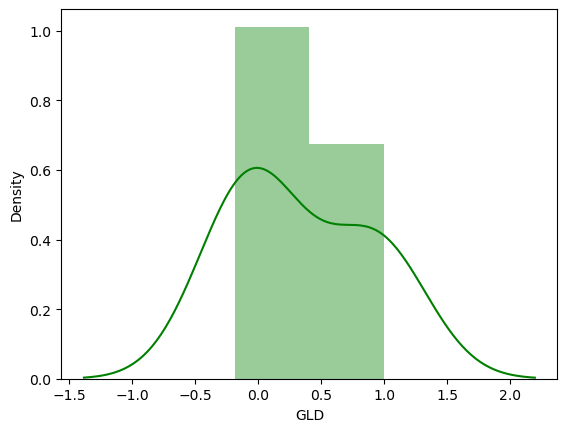

In [27]:
# Checking the distribution of the GLD Price 

sns.distplot(gold_correlation, color="green")

### Train & Test Splitting 

In [28]:
X = gold_data.drop(columns=['GLD'], axis=1)
y = gold_data['GLD']

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [33]:
regressor = RandomForestRegressor(n_estimators=100)

In [34]:
regressor.fit(X_train, Y_train)

RandomForestRegressor()

### Model Evaluation 

In [35]:
test_data_prediction = regressor.predict(X_test)

In [36]:
# R squared Error 
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error:", error_score)

R squared error: 0.9890651721286354


### Compare the actual values and predicted values in a plot 

In [37]:
Y_test = list(Y_test)

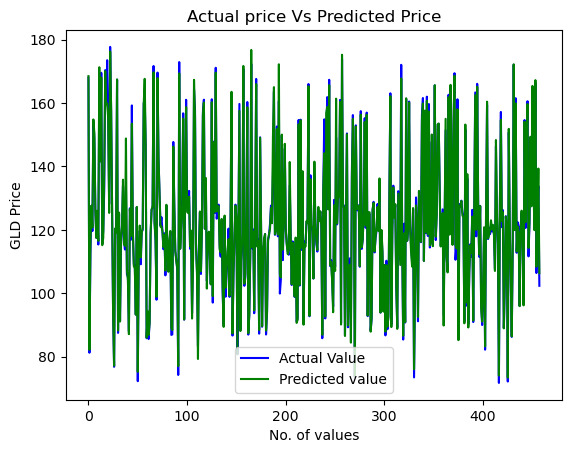

In [38]:
plt.plot(Y_test, color="blue", label="Actual Value")
plt.plot(test_data_prediction, color="green", label="Predicted value")
plt.title("Actual price Vs Predicted Price")
plt.xlabel("No. of values")
plt.ylabel("GLD Price")
plt.legend()
plt.show()

In [ ]:
# We can see that the predicted prices are very close to the actual values 